<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [45]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [46]:
df = pd.read_csv(file_name)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


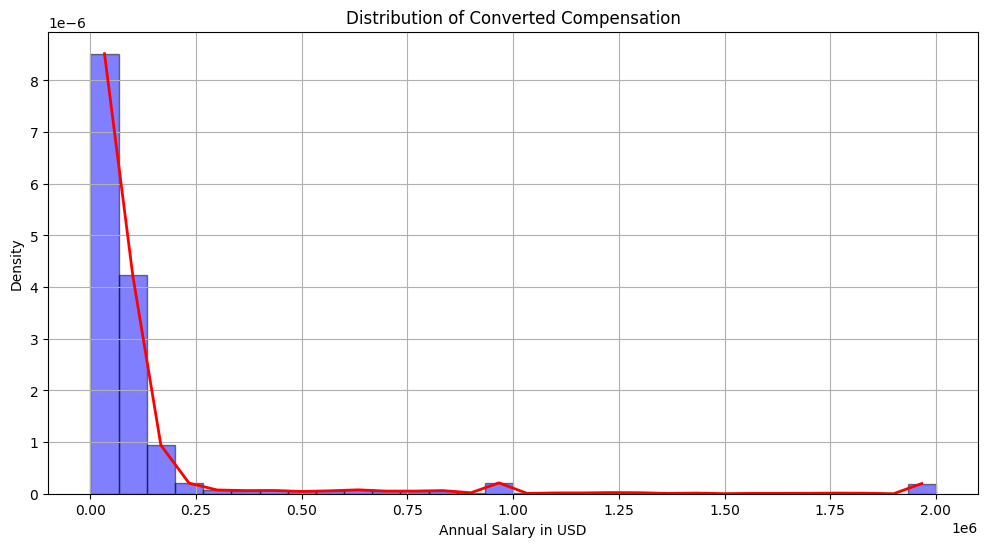

In [48]:
# Drop NA values from the 'ConvertedComp' column for plotting
converted_comp = df['ConvertedComp'].dropna()

# Create a histogram
plt.figure(figsize=(12, 6))  # Set the figure size
plt.hist(converted_comp, bins=30, color='blue', alpha=0.5, density=True, edgecolor='black')  # Histogram

# Overlay a density curve
count, bins = np.histogram(converted_comp, bins=30, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calculate bin centers
plt.plot(bin_centers, count, color='red', linewidth=2)  # Density line

# Adding titles and labels
plt.title('Distribution of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Density')
plt.grid()
plt.show()

Plot the histogram for the column `ConvertedComp`.


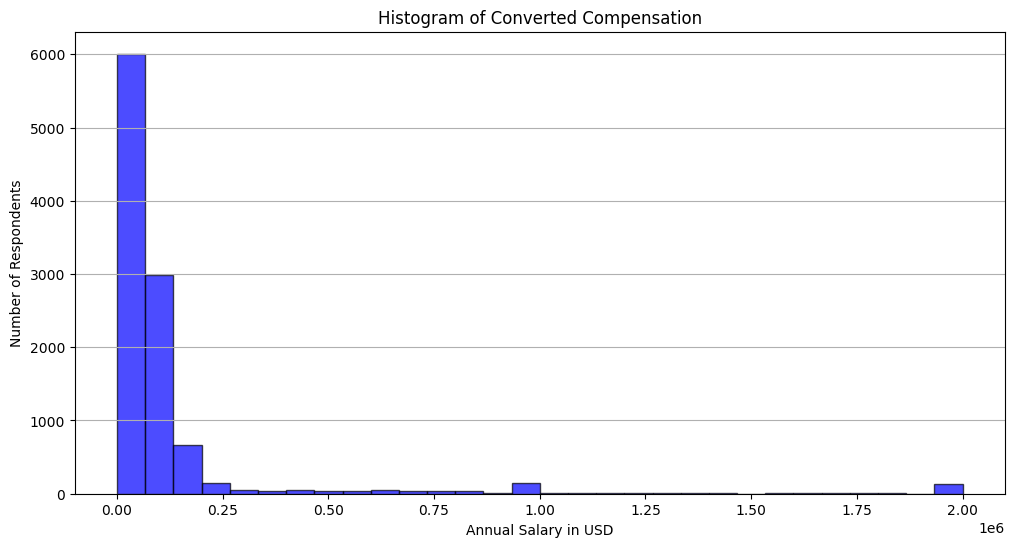

In [49]:

# Create a histogram
plt.figure(figsize=(12, 6))  # Set the figure size
plt.hist(converted_comp, bins=30, color='blue', alpha=0.7, edgecolor='black')  # Histogram with 30 bins
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')  # Add a grid only for the y-axis
plt.show()


What is the median of the column `ConvertedComp`?


In [50]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = converted_comp.median()

# Print the median value
print(f"The median of the 'ConvertedComp' column is: {median_converted_comp}")


The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [51]:
# Count the number of respondents identifying as 'Man'
# Assuming the gender column is named 'Gender' (please adjust if necessary)
man_responders_count = (df['Gender'] == 'Man').sum()

# Print the number of respondents identifying as 'Man'
print(f"Number of responders identifying themselves only as 'Man': {man_responders_count}")


Number of responders identifying themselves only as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [52]:
# Filter for respondents identifying as 'Woman' and drop NA values in 'ConvertedComp'
woman_responders = df[df['Gender'] == 'Woman']  # Adjust the column name if necessary
median_converted_comp_woman = woman_responders['ConvertedComp'].dropna().median()

# Print the median value
print(f"The median ConvertedComp for responders identifying themselves only as 'Woman' is: {median_converted_comp_woman}")


The median ConvertedComp for responders identifying themselves only as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [53]:
# Get the five-number summary for the 'Age' column
five_number_summary = df['Age'].describe()

# Print the five-number summary
print("Five-number summary for the 'Age' column:")
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])


Five-number summary for the 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


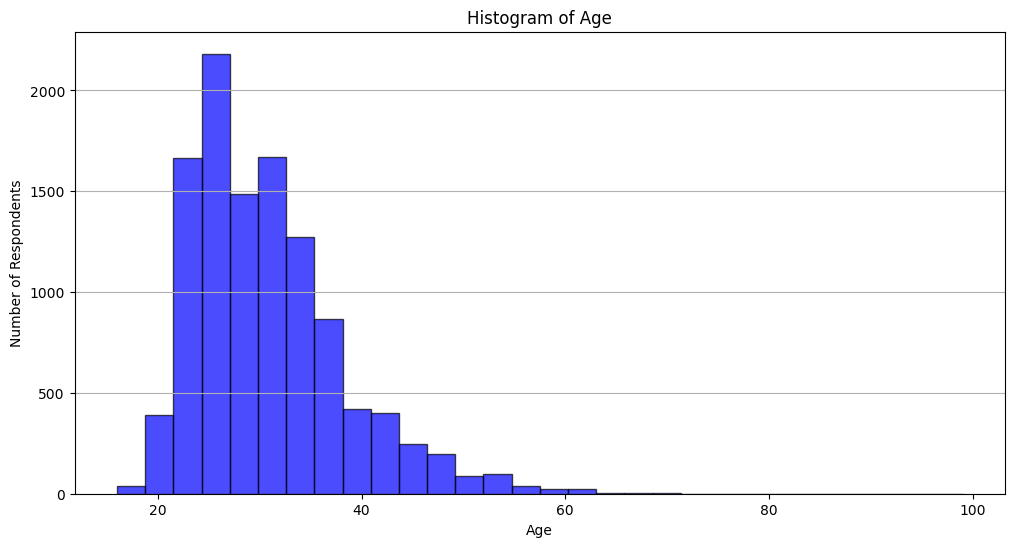

In [54]:
# Drop NA values from the 'Age' column for plotting
age_data = df['Age'].dropna()

# Create a histogram for the 'Age' column
plt.figure(figsize=(12, 6))  # Set the figure size
plt.hist(age_data, bins=30, color='blue', alpha=0.7, edgecolor='black')  # Histogram with 30 bins

# Adding titles and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')  # Add a grid only for the y-axis
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


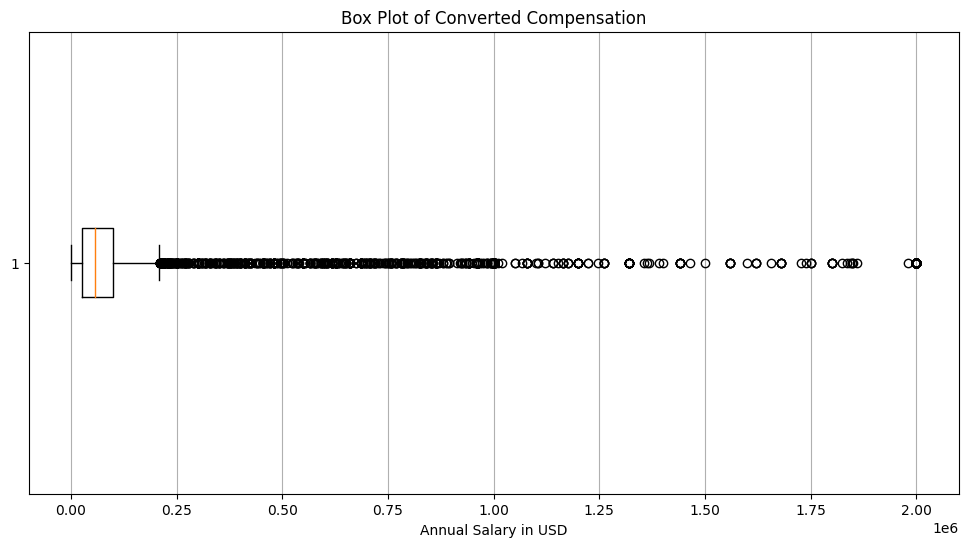

In [55]:
# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(12, 6))  # Set the figure size
plt.boxplot(converted_comp, vert=False)  # Horizontal box plot
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.grid(axis='x')  # Add a grid only for the x-axis
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [56]:
# Drop NA values from the 'ConvertedComp' column
converted_comp_data = df['ConvertedComp'].dropna()

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = converted_comp_data.quantile(0.25)
Q3 = converted_comp_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

First Quartile (Q1): 26868.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [57]:
# Calculate the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")


Lower Bound for Outliers: -82830.0
Upper Bound for Outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [58]:
# Identify outliers
outliers = converted_comp_data[(converted_comp_data < lower_bound) | (converted_comp_data > upper_bound)]

# Count the number of outliers
outlier_count = outliers.count()

# Print the results
print(f"Number of outliers in the 'ConvertedComp' column: {outlier_count}")


Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [59]:
# Create a new DataFrame by removing outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the original and new DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape without outliers: {df_no_outliers.shape}")


Original DataFrame shape: (11398, 85)
New DataFrame shape without outliers: (9703, 85)


In [60]:
# Calculate the median of the 'ConvertedComp' column
converted_comp_data = df_no_outliers['ConvertedComp']
median_converted_comp_after = converted_comp_data.median()
mean_converted_comp_after = converted_comp_data.mean()

# Print the median value
print(f"The median of the 'ConvertedComp' column after moving outliers is: {median_converted_comp_after}")

The median of the 'ConvertedComp' column after moving outliers is: 52704.0


In [61]:
# Count the number of outliers below Q1
outliers_below_Q1 = age_data[age_data < lower_bound]

# Print the count of outliers below Q1
print(f"Number of outliers in 'Age' below Q1: {outliers_below_Q1.count()}")

Number of outliers in 'Age' below Q1: 0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [38]:
# Select only numeric columns for correlation
numeric_df = df_no_outliers.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract the correlation values for 'Age'
age_correlation = correlation_matrix['Age']

# Print the correlation of 'Age' with all other numerical columns
print("Correlation of Age with all other numerical columns:")
print(age_correlation)

Correlation of Age with all other numerical columns:
Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
